# Princpial component analysis

Standardize the features (movies ratings).


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given dataset
ratings = np.array([
    [5, 2, 1, 0, 3],
    [4, 1, 0, 2, 0],
    [3, 5, 0, 4, 5],
    [1, 0, 5, 3, 2],
    [0, 4, 2, 4, 1],
    [2, 3, 0, 1, 0]
])

mean = np.mean(ratings, axis=0)
std_dev = np.std(ratings, axis=0, ddof=1) # using ddof=1 to use sample standard deviation
ratings_std = (ratings - mean) / std_dev

print(ratings_std)

[[ 1.33630621 -0.26726124 -0.16951588 -1.42886902  0.60112971]
 [ 0.80178373 -0.80178373 -0.6780635  -0.20412415 -0.94463241]
 [ 0.26726124  1.33630621 -0.6780635   1.02062073  1.63163779]
 [-0.80178373 -1.33630621  1.86467463  0.40824829  0.08587567]
 [-1.33630621  0.80178373  0.33903175  1.02062073 -0.42937837]
 [-0.26726124  0.26726124 -0.6780635  -0.81649658 -0.94463241]]


Compute the covariance matrix of the dataset. 

In [4]:
cov_matrix = np.cov(ratings_std, rowvar=False)
print(cov_matrix)

[[ 1.         -0.14285714 -0.54366028 -0.65465367  0.24787338]
 [-0.14285714  1.         -0.54366028  0.3927922   0.4131223 ]
 [-0.54366028 -0.54366028  1.          0.26989781  0.01746875]
 [-0.65465367  0.3927922   0.26989781  1.          0.27345706]
 [ 0.24787338  0.4131223   0.01746875  0.27345706  1.        ]]


Find the eigenvalues and the corresponding eigenvectors of the covariance matrix.

In [6]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
Choose the principal components.

In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]   
# Choosing the top 2 principal components for illustration
n_components = 2
eigenvectors_subset = eigenvectors[:, :n_components]

print(eigenvectors_subset)

[[ 0.64436346 -0.09887562]
 [-0.1012213  -0.69100084]
 [-0.4588324   0.44203555]
 [-0.60087868 -0.28300833]
 [-0.05447585 -0.48708553]]


Project the original data onto the lower-dimensional space.

In [11]:
projected_data = np.dot(ratings_std, eigenvectors_subset)
print(projected_data)


[[ 1.79172868  0.08919784]
 [ 1.08302873  0.69291379]
 [-0.35408586 -2.33313383]
 [-1.48693647  1.6695516 ]
 [-1.68766172 -0.3517412 ]
 [ 0.65392664  0.23321181]]


In [ ]:
 Visualize the projected data.

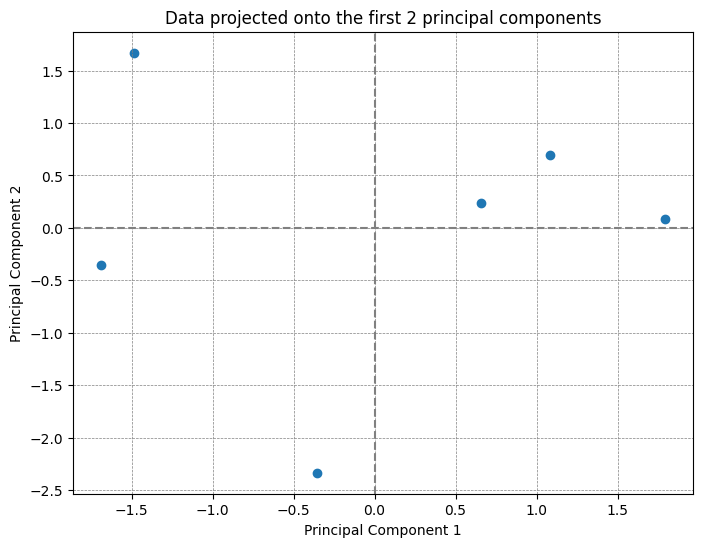

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data projected onto the first 2 principal components')
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
 Visualize the explained variance ratio of the principal components.

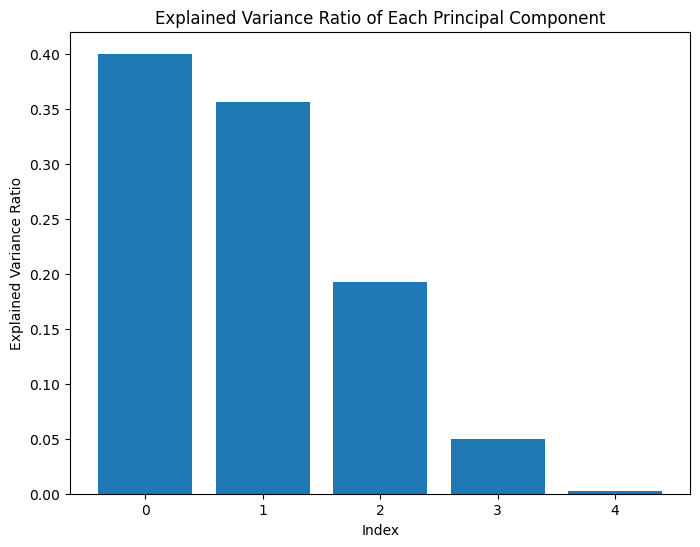

In [13]:
explained_variance_ratio = eigenvalues / eigenvalues.sum()
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.show()